In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import sys
sys.path.append('/home/chenani/ownCloud/Workspaces/Eclipse/dataAnalysis/Sleep-current/src/')

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as pl
import numpy as np
import pickle as pkl
import pandas as pd
import os
from scipy.stats import binom_test
import seaborn as sns
import itertools as it
import fnmatch

/home/chenani/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
ROdf = pd.DataFrame(np.array([[614,27,380,0.08,7.1,'control'],[616,4,51,0.3,7.8,'control'],
                       [3661,102,1021,8.4e-11,10.0,'control'],[3906,155,1305,1.2e-22,11.9,'control'],
                      [434,35,276,5.2e-7,12.7,'lesion'],[405,12,149,0.09,8.0,'lesion'],
                      [3903,3,79,1.0,3.7,'lesion'],[3838,17,396,0.6,4.2,'lesion'],
                      [3837,13,188,0.2,6.9,'lesion'],[3754,2,45,1.0,4.4,'lesion'],
                      [3656,16,194,0.047,8.2,'lesion']]),
            columns=['animal','N_sig','N_all','pv','percentile','group'])
ROdf = ROdf.convert_objects(convert_numeric=True)
PRdf = pd.DataFrame(np.array([[614,73,354,1.4e-14,13.7,'control'],[616,20,133,1.3e-10,15.0,'control'],
                       [3661,208,1357,7.3e-46,15.3,'control'],[3906,213,1462,1.9e-43,14.6,'control'],
                      [434,37,293,1.4e-14,12.6,'lesion'],[405,16,223,0.2,7.2,'lesion'],
                      [3903,20,201,3.2e-4,9.9,'lesion'],[3838,71,664,3.4e-9,10.7,'lesion'],
                      [3837,49,367,5.5e-10,13.3,'lesion'],[3754,11,86,3.7e-4,12.7,'lesion'],
                      [3656,47,321,5.7e-11,14.6,'lesion']]),
            columns=['animal','N_sig','N_all','pv','percentile','group'])
PRdf = PRdf.convert_objects(convert_numeric=True)

/home/chenani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/home/chenani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


/home/chenani/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


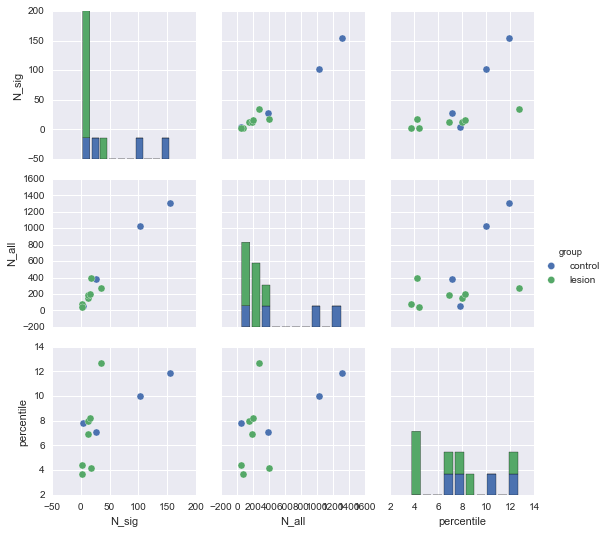

In [3]:
sns.pairplot(ROdf,vars=['N_sig','N_all','percentile'],hue='group',plot_kws=dict(s=50))

In [4]:
metaDB = pd.DataFrame(np.array([
            [ 614,90,'D1',25,17,17,201,binom_test(17,201,0.05),1700.0/201,32,248,binom_test(32,248,0.05),3200.0/248,'control'],
            [ 614,None,'D2',17,17, 7,120,binom_test(7,120,0.05) , 700.0/120,22,183,binom_test(22,183,0.05),2200.0/183,'control'],
            [ 614,None,'D3',14,19,27,380,binom_test(27,380,0.05),2700.0/380,73,534,binom_test(73,534,0.05),7300.0/534,'control'],
            [ 616,None,'D1',25,19, 4, 51,binom_test( 4, 51,0.05), 400.0/ 51,20,133,binom_test(20,133,0.05),2000.0/133,'control'],
            [3661,None,'D1',22,20,30,282,binom_test(30,282,0.05),3000.0/282,70,399,binom_test(70,399,0.05),7000.0/399,'control'],
            [3661,None,'D2',21,20,27,247,binom_test(27,247,0.05),2700.0/247,62,369,binom_test(62,369,0.05),6200.0/369,'control'],
            [3661,None,'D3',24,23,45,492,binom_test(45,492,0.05),4500.0/492,76,589,binom_test(76,589,0.05),7600.0/589,'control'],
            [3906,None,'D1',45,47,52,379,binom_test(52,379,0.05),5200.0/379,51,389,binom_test(51,389,0.05),5100.0/389,'control'],
            [3906,None,'D2',45,40,13,266,binom_test(13,266,0.05),1300.0/266,23,327,binom_test(23,327,0.05),2300.0/327,'control'],
            [3906,None,'D3',32,40,16,224,binom_test(16,224,0.05),1600.0/224,46,268,binom_test(46,268,0.05),4600.0/268,'control'],
            [3906,None,'D4',38,39,74,436,binom_test(74,436,0.05),7400.0/436,93,478,binom_test(93,478,0.05),9300.0/478,'control'],
            [3903,None,'D1',14,15, 3, 65,binom_test( 3, 65,0.05), 300.0/ 65,13,140,binom_test(13,140,0.05),1300.0/140,'lesion' ],
            [3903,None,'D2', 8, 7, 0,  7,binom_test( 0,  7,0.05),  00.0/  7, 4, 44,binom_test( 4, 44,0.05), 400.0/ 44,'lesion' ],
            [3903,None,'D3', 5, 6, 0,  0,binom_test( 0,  0,0.05),  np.nan  , 0,  5,binom_test( 0,  5,0.05),  00.0/  5,'lesion' ],
            [3903,None,'D4',10, 7, 0,  7,binom_test( 0,  7,0.05),  00.0/  7, 3, 12,binom_test( 3, 12,0.05), 300.0/ 12,'lesion' ],
            [3838, 85.2,'D1', 6, 6, 0,  2,binom_test( 0,  2,0.05),  00.0/  2, 6, 19,binom_test( 6, 19,0.05), 600.0/ 19,'lesion' ],
            [3838, 85.2,'D2',16,18, 5,162,binom_test( 5,162,0.05), 500.0/162,10,251,binom_test(10,251,0.05),1000.0/251,'lesion' ],
            [3838, 85.2,'D3',10,12,10,213,binom_test(10,213,0.05),1000.0/213,55,348,binom_test(55,348,0.05),1000.0/251,'lesion' ],
            [3838, 85.2,'D4',12,18, 1, 19,binom_test( 1, 19,0.05), 100.0/ 19, 0, 46,binom_test( 0, 46,0.05),  00.0/ 46,'lesion' ],
            [3837, 99.0,'D1',12,13,13,122,binom_test(13,122,0.05),1300.0/122,29,244,binom_test(29,244,0.05),2900.0/244,'lesion' ],
            [3837, 99.0,'D3', 9,11, 0, 66,binom_test( 0, 66,0.05),  00.0/ 66,19,128,binom_test(19,128,0.05),1900.0/128,'lesion' ],
            [3837, 99.0,'D4', 4, 5, 0,  0,binom_test( 0,  0,0.05),  np.nan  , 1,  1,binom_test( 1,  1,0.05),      None,'lesion' ],
            [3754, 95.6,'D2', 6, 5, 0,  1,binom_test( 0,  1,0.05),   0.0/1  , 1,  6,binom_test( 1,  6,0.05), 100.0/  6,'lesion' ],
            [3754, 95.6,'D2',12,11, 2, 45,binom_test( 2, 45,0.05), 200.0/ 45,11, 86,binom_test(11, 86,0.05),1100.0/ 86,'lesion' ],
            [3656,100.0,'D1',13,14, 8,123,binom_test( 8,123,0.05), 800.0/123,29,190,binom_test(29,190,0.05),2900.0/190,'lesion' ],
            [3656,100.0,'D2',15,15, 8, 81,binom_test( 8, 81,0.05), 800.0/ 81,18,141,binom_test(18,141,0.05),1800.0/141,'lesion' ],
            [ 434, 84.5,'D1',43,43,35,276,binom_test(35,276,0.05),3500.0/276,37,293,binom_test(37,293,0.05),3700.0/293,'lesion' ],
            [ 405, 74.5,'D1',11,13,12,149,binom_test(12,149,0.05),1200.0/149,16,223,binom_test(16,223,0.05),1600.0/223,'lesion' ],
        ]),
                      columns=['animal','lesion_extent','session','N_pCell_left','N_pCell_right','N_sig_RO','N_all_RO','pv_RO','prcnt_RO','N_sig_PR','N_all_PR','pv_PR','prcnt_PR','group'])
metaDB = metaDB.convert_objects(convert_numeric=True)
metaDB

/home/chenani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,animal,lesion_extent,session,N_pCell_left,N_pCell_right,N_sig_RO,N_all_RO,pv_RO,prcnt_RO,N_sig_PR,N_all_PR,pv_PR,prcnt_PR,group
0,614,90.0,D1,25,17,17,201,3.354004e-02,8.457711,32,248,1.070033e-06,12.903226,control
1,614,NaN,D2,17,17,7,120,6.718533e-01,5.833333,22,183,2.207012e-04,12.021858,control
2,614,NaN,D3,14,19,27,380,7.565074e-02,7.105263,73,534,1.397656e-14,13.670412,control
3,616,NaN,D1,25,19,4,51,3.236835e-01,7.843137,20,133,1.099386e-05,15.037594,control
4,3661,NaN,D1,22,20,30,282,1.036956e-04,10.638298,70,399,8.188760e-20,17.543860,control
5,3661,NaN,D2,21,20,27,247,1.761970e-04,10.931174,62,369,8.357237e-17,16.802168,control
6,3661,NaN,D3,24,23,45,492,1.124798e-04,9.146341,76,589,8.620599e-14,12.903226,control
7,3906,NaN,D1,45,47,52,379,6.602870e-11,13.720317,51,389,5.068221e-10,13.110540,control
8,3906,NaN,D2,45,40,13,266,1.000000e+00,4.887218,23,327,9.782008e-02,7.033639,control
9,3906,NaN,D3,32,40,16,224,1.639489e-01,7.142857,46,268,3.182309e-13,17.164179,control


In [7]:
metaDB.to_csv('../RO-PR-dataframe.csv')
metaDB.to_excel('../RO-PR-dataframe.xls')

In [6]:
metaDB[metaDB.animal== 614]

,animal,lesion_extent,session,N_pCell_left,N_pCell_right,N_sig_RO,N_all_RO,pv_RO,prcnt_RO,N_sig_PR,N_all_PR,pv_PR,prcnt_PR,group
0,614,90,D1,25,17,17,201,0.033540,8.457711,32,248,1.070033e-06,12.903226,control
1,614,NaN,D2,17,17,7,120,0.671853,5.833333,22,183,2.207012e-04,12.021858,control
2,614,NaN,D3,14,19,27,380,0.075651,7.105263,73,534,1.397656e-14,13.670412,control


/home/chenani/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


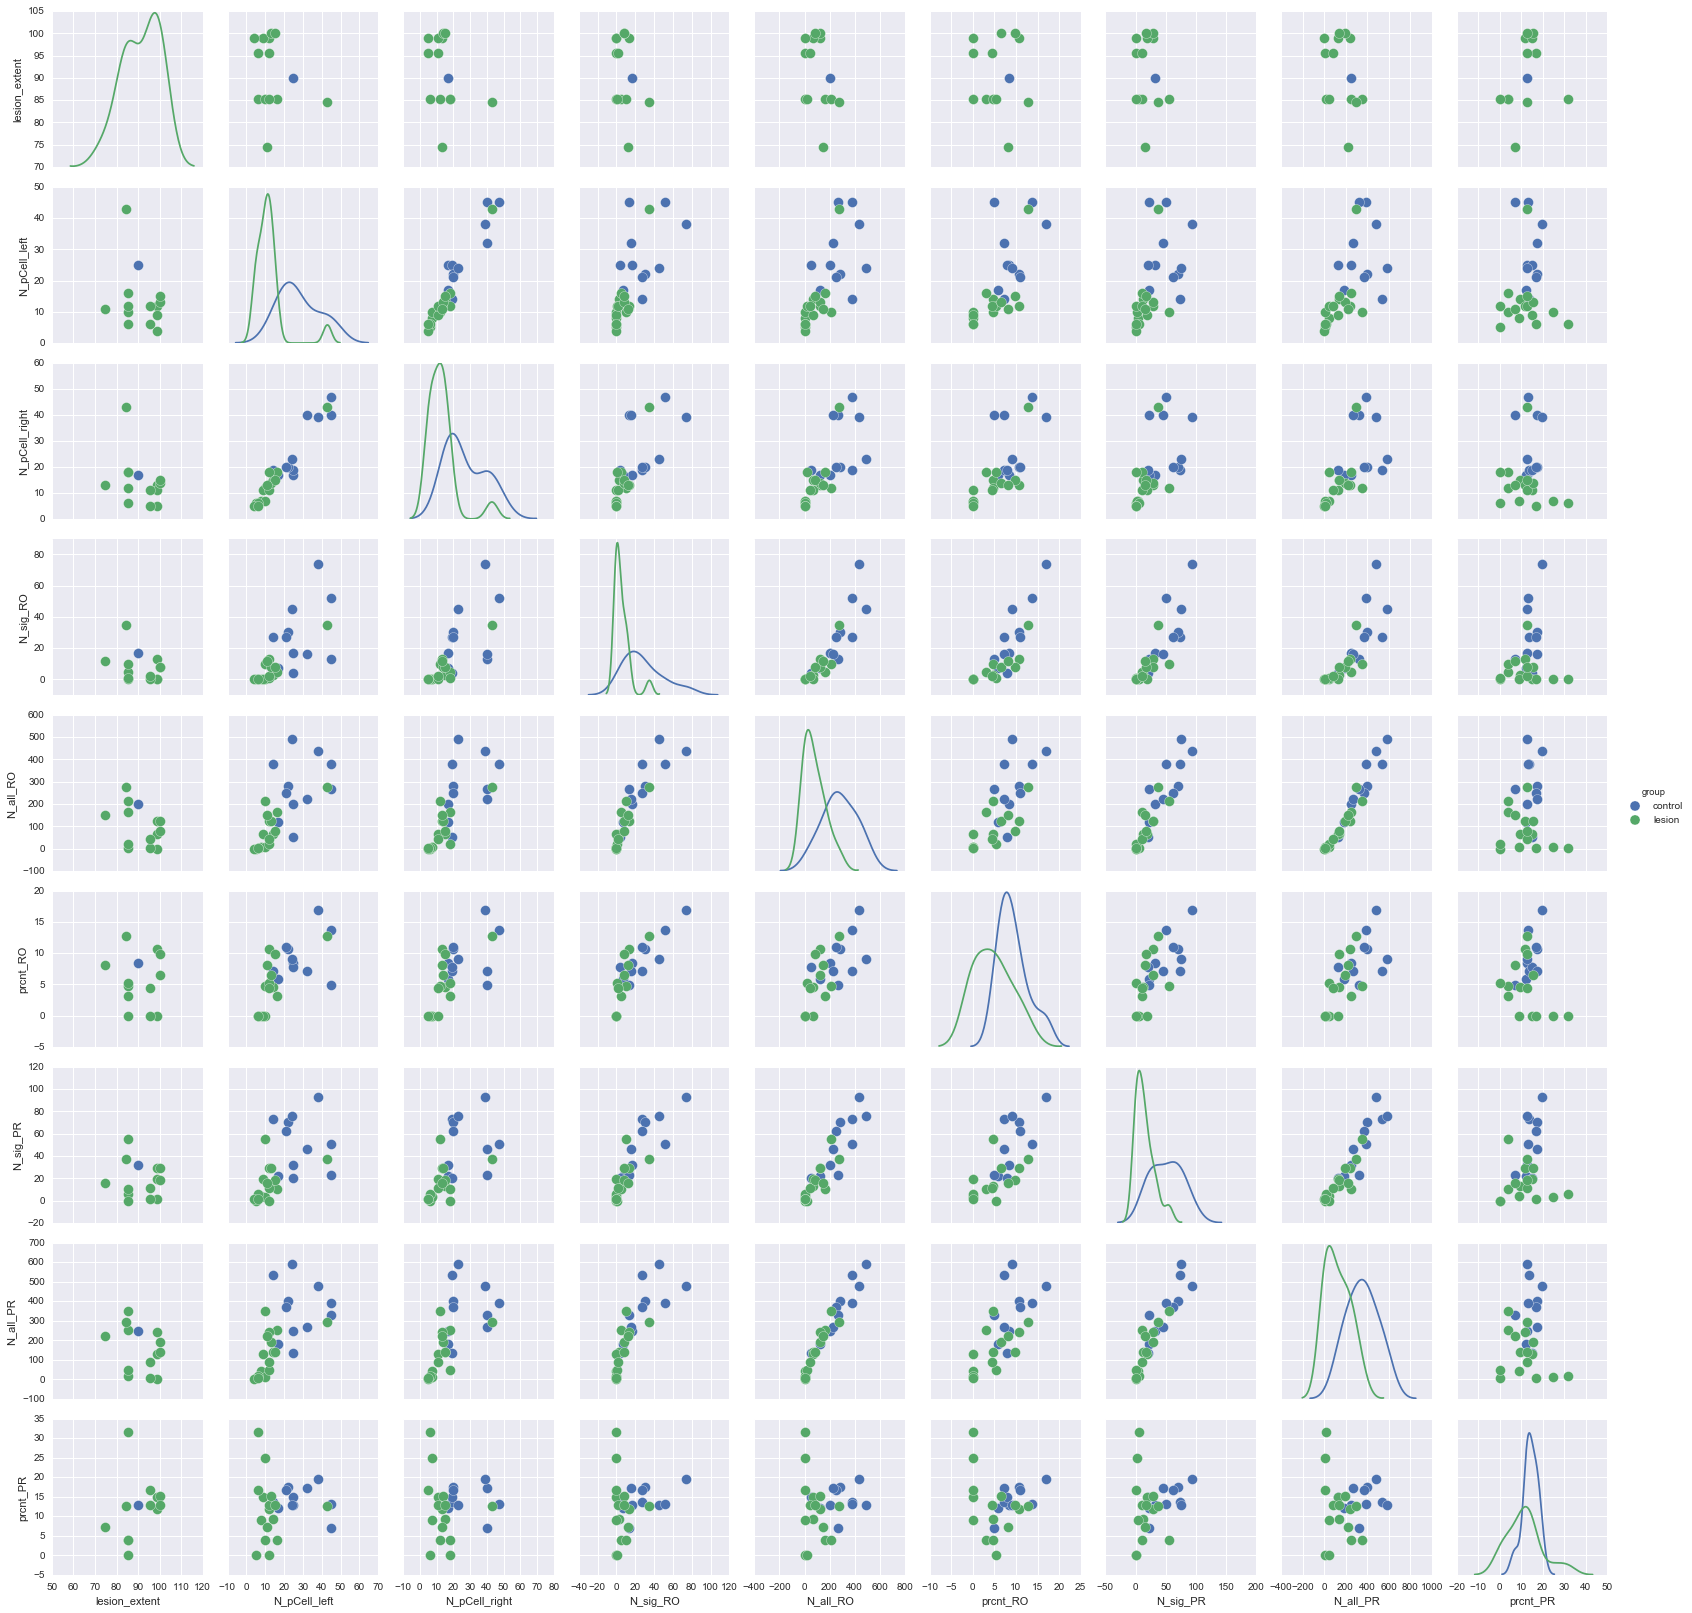

In [8]:
#sns.pairplot(metaDB,vars=['lesion_extent','N_pCell_left','N_pCell_right','N_sig_RO','N_all_RO','prcnt_RO','N_sig_PR','N_all_PR','prcnt_PR'],
#             hue='group',diag_kind='kde', plot_kws=dict(s=100))